In [1]:
from pickle import load
from pickle import dump
import numpy as np
import pandas as pd
from dateutil.parser import parse
import os
from collections import Counter
import operator
from random import sample

In [2]:
def dataLoader(orderPath):
    # THis is the method to load data from the input files    
    orders = pd.read_csv(orderPath,encoding = "ISO-8859-1")
    return orders

In [3]:
# Change the filename to point to your actual data set
filename = "Datasets/Retail/OnlineRetail.csv"
# Let us load the customer Details
custDetails = dataLoader(filename)
custDetails.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


We can see the first five rows of the customer details. Further in the exercise we have to work a lot with the dates and therefore we need to extract relevant details from the date column like the day, weekday, month, year etc. We will do that with the date parser library. Let us now parse all the date related column and create new columns storing the new details we extract after parsing the dates

In [4]:
#Parsing  the date
custDetails['Parse_date'] = custDetails["InvoiceDate"].apply(lambda x: parse(x))
# Parsing the weekdaty
custDetails['Weekday'] = custDetails['Parse_date'].apply(lambda x: x.weekday())
# Parsing the Day
custDetails['Day'] = custDetails['Parse_date'].apply(lambda x: x.strftime("%A"))
# Parsing the Month
custDetails['Month'] = custDetails['Parse_date'].apply(lambda x: x.strftime("%B"))
# Getting the year
custDetails['Year'] = custDetails['Parse_date'].apply(lambda x: x.strftime("%Y"))
# Getting year and month together as one feature
custDetails['year_month'] = custDetails['Year'] + "_" +custDetails['Month']

custDetails.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Parse_date,Weekday,Day,Month,Year,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2,Wednesday,December,2010,2010_December
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2,Wednesday,December,2010,2010_December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2,Wednesday,December,2010,2010_December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2,Wednesday,December,2010,2010_December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2,Wednesday,December,2010,2010_December


In [5]:
# Creating gross value column
custDetails['grossValue'] = custDetails["Quantity"] * custDetails["UnitPrice"]
custDetails.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Parse_date,Weekday,Day,Month,Year,year_month,grossValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2,Wednesday,December,2010,2010_December,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2,Wednesday,December,2010,2010_December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2,Wednesday,December,2010,2010_December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2,Wednesday,December,2010,2010_December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2,Wednesday,December,2010,2010_December,20.34


In [6]:
import pandas as pd
import lifetimes

In [7]:
# Converting data to RFM format
RfmAgeTrain = lifetimes.utils.summary_data_from_transaction_data(custDetails, 'CustomerID', 'Parse_date', 'grossValue')
RfmAgeTrain

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000
...,...,...,...,...
18280.0,0.0,0.0,277.0,0.000000
18281.0,0.0,0.0,180.0,0.000000
18282.0,2.0,119.0,126.0,38.195000


In [8]:
RfmAgeTrain = RfmAgeTrain.reset_index()
RfmAgeTrain

,CustomerID,frequency,recency,T,monetary_value
0,12346.0,0.0,0.0,325.0,0.000000
1,12347.0,6.0,365.0,367.0,599.701667
2,12348.0,3.0,283.0,358.0,301.480000
3,12349.0,0.0,0.0,18.0,0.000000
4,12350.0,0.0,0.0,310.0,0.000000
...,...,...,...,...,...
4367,18280.0,0.0,0.0,277.0,0.000000
4368,18281.0,0.0,0.0,180.0,0.000000
4369,18282.0,2.0,119.0,126.0,38.195000
4370,18283.0,13.0,334.0,337.0,152.802308


Let us find customer clusters based on each of the parameters. Let us start with the recency score to find clusters


Reference:

https://towardsdatascience.com/data-driven-growth-with-python-part-2-customer-segmentation-5c019d150444

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

For the purpose of getting the recency matrix let us take a subset of the data frame with only customer ID and recency value

In [10]:
user_recency = RfmAgeTrain[['CustomerID','recency']]
user_recency.head()

,CustomerID,recency
0,12346.0,0.0
1,12347.0,365.0
2,12348.0,283.0
3,12349.0,0.0
4,12350.0,0.0


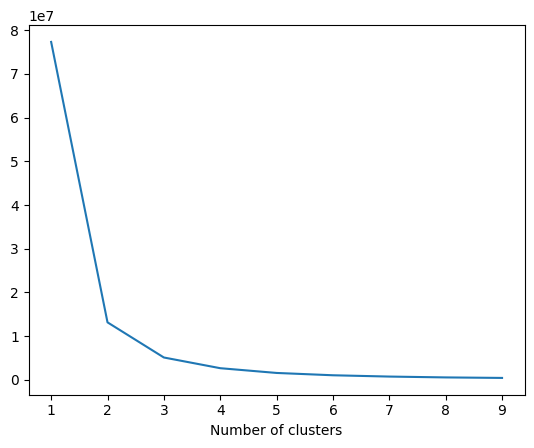

In [11]:
# Fitting a kmeans algorithm for the Recency score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Initialize a dictionary to store sum of squared error
sse = {}
recency = user_recency[['recency']]

# Loop through different cluster combinations
for k in range(1,10):
    # Fit the Kmeans model using the iterated cluster value
    kmeans = KMeans(n_clusters=k,max_iter=2000).fit(recency)
    # Store the cluster against the sum of squared error for each cluster formation   
    sse[k] = kmeans.inertia_
    
# Plotting all the clusters
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of clusters")
plt.show()

In [ ]:
recency

From the elbow method we can see that the first major elbow is at 2 clusters and the second more flatter tapering is in 4 clusters. Let us adopt the 4 cluster method for our case and then predict the number of clusters using kmeans.

In [12]:
# let us take four clusters 
kmeans = KMeans(n_clusters=4)
kmeans.fit(user_recency[['recency']])
user_recency['RecencyCluster'] = kmeans.predict(user_recency[['recency']])
user_recency

,CustomerID,recency,RecencyCluster
0,12346.0,0.0,0
1,12347.0,365.0,1
2,12348.0,283.0,1
3,12349.0,0.0,0
4,12350.0,0.0,0
...,...,...,...
4367,18280.0,0.0,0
4368,18281.0,0.0,0
4369,18282.0,119.0,3
4370,18283.0,334.0,1


In [13]:
user_recency.sort_values(by='recency',ascending=False).reset_index(drop=True)

,CustomerID,recency,RecencyCluster
0,13777.0,373.0,1
1,12748.0,373.0,1
2,15311.0,373.0,1
3,12433.0,373.0,1
4,12662.0,373.0,1
...,...,...,...
4367,16282.0,0.0,0
4368,16281.0,0.0,0
4369,13739.0,0.0,0
4370,16276.0,0.0,0


Let us take the mean of the recency to check if the clustering is in a particular order.

In [14]:
user_recency.groupby('RecencyCluster')['recency'].mean().reset_index()

,RecencyCluster,recency
0,0,7.727087
1,1,334.934537
2,2,228.101415
3,3,115.859854


From the above we can see that the clustering is in a jumbled fashion. We can see that cluster 0 is the most recent customer, cluster 2 the second most recent and cluster 1 the most infrequent cluster. Ideally we want the order in the order of 0,1 and 2, respectively. Let us create a new function to get the order in the way we want

In [15]:
# Function for ordering cluster numbers

def order_cluster(cluster_field_name,target_field_name,data,ascending):    
    # Group the data on the clusters and summarise the target field(recency/frequency/monetary) based on the mean value
    data_new = data.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    # Sort the data based on the values of the target field
    data_new = data_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    # Create a new column called index for storing the sorted index values
    data_new['index'] = data_new.index
    # Merge the summarised data onto the original data set so that the index is mapped to the cluster
    data_final = pd.merge(data,data_new[[cluster_field_name,'index']],on=cluster_field_name)
    # From the final data drop the cluster name as the index is the new cluster
    data_final = data_final.drop([cluster_field_name],axis=1)
    # Rename the index column to cluster name
    data_final = data_final.rename(columns={'index':cluster_field_name})
    return data_final

In [16]:
user_recency = order_cluster('RecencyCluster','recency',user_recency,False)
user_recency.head()

,CustomerID,recency,RecencyCluster
0,12346.0,0.0,3
1,12349.0,0.0,3
2,12350.0,0.0,3
3,12353.0,0.0,3
4,12354.0,0.0,3


In [17]:
user_recency.groupby('RecencyCluster')['recency'].mean().reset_index()

,RecencyCluster,recency
0,0,334.934537
1,1,228.101415
2,2,115.859854
3,3,7.727087


Now we can see that the cluster numbering is in a logic order. Let us do the same for frequency and monetary too

In [18]:
def clusterSorter(target_field_name,ascending):    
    # Make the subset data frame using the required feature
    user_variable = RfmAgeTrain[['CustomerID',target_field_name]]
    # let us take four clusters indicating 4 quadrants
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(user_variable[[target_field_name]])
    # Create the cluster field name from the target field name
    cluster_field_name = target_field_name + 'Cluster'
    # Create the clusters
    user_variable[cluster_field_name] = kmeans.predict(user_variable[[target_field_name]])
    # Sort and reset index
    user_variable.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    # Sort the data frame according to cluster values
    user_variable = order_cluster(cluster_field_name,target_field_name,user_variable,ascending)
    return user_variable
    

In [19]:
# Implementing for user frequency
user_freqency = clusterSorter('frequency',True)
user_freqency.groupby('frequencyCluster')['frequency'].mean().reset_index()

,frequencyCluster,frequency
0,0,1.213047
1,1,8.042424
2,2,24.666667
3,3,92.333333


In [20]:
# Implementing for monetary values
user_monetary = clusterSorter('monetary_value',True)
user_monetary.groupby('monetary_valueCluster')['monetary_value'].mean().reset_index()

,monetary_valueCluster,monetary_value
0,0,63.888143
1,1,428.298916
2,2,1746.756647
3,3,6900.334321


In [21]:
RfmAgeTrain.head()

,CustomerID,frequency,recency,T,monetary_value
0,12346.0,0.0,0.0,325.0,0.000000
1,12347.0,6.0,365.0,367.0,599.701667
2,12348.0,3.0,283.0,358.0,301.480000
3,12349.0,0.0,0.0,18.0,0.000000
4,12350.0,0.0,0.0,310.0,0.000000


In [22]:
# Merging the individual data frames with the main data frame
RfmAgeTrain = pd.merge(RfmAgeTrain,user_monetary[["CustomerID",'monetary_valueCluster']],on='CustomerID')
RfmAgeTrain = pd.merge(RfmAgeTrain,user_freqency[["CustomerID",'frequencyCluster']],on='CustomerID')
RfmAgeTrain = pd.merge(RfmAgeTrain,user_recency[["CustomerID",'RecencyCluster']],on='CustomerID')
RfmAgeTrain.head()

,CustomerID,frequency,recency,T,monetary_value,monetary_valueCluster,frequencyCluster,RecencyCluster
0,12346.0,0.0,0.0,325.0,0.000000,0,0,3
1,12347.0,6.0,365.0,367.0,599.701667,1,1,0
2,12348.0,3.0,283.0,358.0,301.480000,1,0,0
3,12349.0,0.0,0.0,18.0,0.000000,0,0,3
4,12350.0,0.0,0.0,310.0,0.000000,0,0,3


In [23]:
# Calculate the overall score
RfmAgeTrain['OverallScore'] = RfmAgeTrain['RecencyCluster'] + RfmAgeTrain['frequencyCluster'] + RfmAgeTrain['monetary_valueCluster']
RfmAgeTrain

,CustomerID,frequency,recency,T,monetary_value,monetary_valueCluster,frequencyCluster,RecencyCluster,OverallScore
0,12346.0,0.0,0.0,325.0,0.000000,0,0,3,3
1,12347.0,6.0,365.0,367.0,599.701667,1,1,0,2
2,12348.0,3.0,283.0,358.0,301.480000,1,0,0,1
3,12349.0,0.0,0.0,18.0,0.000000,0,0,3,3
4,12350.0,0.0,0.0,310.0,0.000000,0,0,3,3
...,...,...,...,...,...,...,...,...,...
4367,18280.0,0.0,0.0,277.0,0.000000,0,0,3,3
4368,18281.0,0.0,0.0,180.0,0.000000,0,0,3,3
4369,18282.0,2.0,119.0,126.0,38.195000,0,0,2,2
4370,18283.0,13.0,334.0,337.0,152.802308,0,1,0,1


In [24]:
RfmAgeTrain.groupby('OverallScore')['frequency','recency','monetary_value'].mean().reset_index()

,OverallScore,frequency,recency,monetary_value
0,0,2.537879,323.371212,153.399899
1,1,4.331058,280.911263,225.769403
2,2,5.256434,225.383272,299.277531
3,3,1.979715,47.322831,117.707783
4,4,6.803493,88.825328,587.169560
5,5,9.350000,106.650000,2349.674710


In [25]:
RfmAgeTrain.groupby('OverallScore')['frequency'].count().reset_index()

,OverallScore,frequency
0,0,132
1,1,586
2,2,1088
3,3,2317
4,4,229
5,5,20


In [26]:
RfmAgeTrain['Segment'] = 'Q1'
RfmAgeTrain.loc[(RfmAgeTrain.OverallScore == 0) ,'Segment']='Q2'
RfmAgeTrain.loc[(RfmAgeTrain.OverallScore == 1),'Segment']='Q2'
RfmAgeTrain.loc[(RfmAgeTrain.OverallScore == 2),'Segment']='Q3'
RfmAgeTrain.loc[(RfmAgeTrain.OverallScore == 4),'Segment']='Q4'
RfmAgeTrain.loc[(RfmAgeTrain.OverallScore == 5),'Segment']='Q4'
#RfmAgeTrain.loc[(RfmAgeTrain.OverallScore == 6),'Segment']='Q4'

RfmAgeTrain

,CustomerID,frequency,recency,T,monetary_value,monetary_valueCluster,frequencyCluster,RecencyCluster,OverallScore,Segment
0,12346.0,0.0,0.0,325.0,0.000000,0,0,3,3,Q1
1,12347.0,6.0,365.0,367.0,599.701667,1,1,0,2,Q3
2,12348.0,3.0,283.0,358.0,301.480000,1,0,0,1,Q2
3,12349.0,0.0,0.0,18.0,0.000000,0,0,3,3,Q1
4,12350.0,0.0,0.0,310.0,0.000000,0,0,3,3,Q1
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,0.0,0.0,277.0,0.000000,0,0,3,3,Q1
4368,18281.0,0.0,0.0,180.0,0.000000,0,0,3,3,Q1
4369,18282.0,2.0,119.0,126.0,38.195000,0,0,2,2,Q3
4370,18283.0,13.0,334.0,337.0,152.802308,0,1,0,1,Q2


In [27]:
RfmAgeTrain.groupby('Segment')['frequency','recency','monetary_value'].mean().reset_index()

,Segment,frequency,recency,monetary_value
0,Q1,1.979715,47.322831,117.707783
1,Q2,4.001393,288.717270,212.464703
2,Q3,5.256434,225.383272,299.277531
3,Q4,7.008032,90.257028,728.736239


In [28]:
# Merging the customer details with the segment
custDetails = pd.merge(custDetails, RfmAgeTrain, on=['CustomerID'], how='left')
custDetails.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Parse_date,Weekday,...,grossValue,frequency,recency,T,monetary_value,monetary_valueCluster,frequencyCluster,RecencyCluster,OverallScore,Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2,...,15.30,2.0,71.0,373.0,1894.645,2.0,0.0,2.0,4.0,Q4
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2,...,20.34,2.0,71.0,373.0,1894.645,2.0,0.0,2.0,4.0,Q4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2,...,22.00,2.0,71.0,373.0,1894.645,2.0,0.0,2.0,4.0,Q4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2,...,20.34,2.0,71.0,373.0,1894.645,2.0,0.0,2.0,4.0,Q4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2,...,20.34,2.0,71.0,373.0,1894.645,2.0,0.0,2.0,4.0,Q4


In [29]:
# Feature engineering of the customer details data frame
# Get the date  as a seperate column
custDetails['Date'] = custDetails['Parse_date'].apply(lambda x: x.strftime("%d"))
# Converting date to float for easy comparison
custDetails['Date']  = custDetails['Date'] .astype('float64')
# Get the period of month column
custDetails['monthPeriod'] = custDetails['Date'].apply(lambda x: int(x > 15))

custDetails.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Parse_date,Weekday,...,recency,T,monetary_value,monetary_valueCluster,frequencyCluster,RecencyCluster,OverallScore,Segment,Date,monthPeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2,...,71.0,373.0,1894.645,2.0,0.0,2.0,4.0,Q4,1.0,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2,...,71.0,373.0,1894.645,2.0,0.0,2.0,4.0,Q4,1.0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2,...,71.0,373.0,1894.645,2.0,0.0,2.0,4.0,Q4,1.0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2,...,71.0,373.0,1894.645,2.0,0.0,2.0,4.0,Q4,1.0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2,...,71.0,373.0,1894.645,2.0,0.0,2.0,4.0,Q4,1.0,0


In [30]:
# Aggregate the custDetails to get a distribution of rewards
rewardFull = custDetails.groupby(['Segment','Month','monthPeriod','Day','StockCode'])['Quantity'].agg('sum').reset_index()
rewardFull

,Segment,Month,monthPeriod,Day,StockCode,Quantity
0,Q1,April,0,Friday,10002,120
1,Q1,April,0,Friday,10125,20
2,Q1,April,0,Friday,10135,10
3,Q1,April,0,Friday,15036,48
4,Q1,April,0,Friday,15039,6
...,...,...,...,...,...,...
264404,Q4,September,1,Wednesday,C2,3
264405,Q4,September,1,Wednesday,CRUK,-1
264406,Q4,September,1,Wednesday,DOT,1
264407,Q4,September,1,Wednesday,M,182


In [31]:
# Finding unique value for each of the segment 

segments = list(rewardFull.Segment.unique())
print('segments',segments)
months = list(rewardFull.Month.unique())
print('months',months)
monthPeriod = list(rewardFull.monthPeriod.unique())
print('monthPeriod',monthPeriod)
days = list(rewardFull.Day.unique())
print('days',days)



segments ['Q1', 'Q2', 'Q3', 'Q4']
months ['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']
monthPeriod [0, 1]
days ['Friday', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']


In [32]:
# Defining some dictionaries for storing the values
countDic = {} # Dictionary to store the count of products
polDic = {} # Dictionary to store the value distribution
rewDic = {} # Dictionary to store the reward distribution
recoCount = {} # Dictionary to store the recommendation counts

In [33]:
for seg in segments:
    for mon in months:
        for period in monthPeriod:
            for day in days:
                # Get the subset of the data
                subset1 = rewardFull[(rewardFull['Segment'] == seg) & (rewardFull['Month'] == mon) & (
                            rewardFull['monthPeriod'] == period) & (rewardFull['Day'] == day)]                
                # Check if the subset is valid
                if len(subset1) > 0:
                    # Iterate through each of the subset and get the products and its quantities
                    stateId = str(seg) + '_' + mon + '_' + str(period) + '_' + day
                    # Define a dictionary for the state ID
                    countDic[stateId] = {}                    
                    for i in range(len(subset1.StockCode)):
                        countDic[stateId][subset1.iloc[i]['StockCode']] = int(subset1.iloc[i]['Quantity'])
                        

In [34]:
len(countDic)

572

In [35]:
stateId = 'Q4_September_1_Wednesday'
countDic[stateId]

{'10125': 20,
 '10135': 5,
 '11001': 2,
 '15044B': 3,
 '15044D': 6,
 '15056BL': 3,
 '15056N': 3,
 '16161P': 25,
 '16169E': 50,
 '16218': 240,
 '16225': 5,
 '16235': 62,
 '16236': 28,
 '16237': 30,
 '16238': 1,
 '16258A': 1,
 '17003': 36,
 '20655': 2,
 '20659': 4,
 '20661': 1,
 '20674': 16,
 '20675': 88,
 '20676': 17,
 '20677': 2,
 '20679': 7,
 '20685': 2,
 '20707': 1,
 '20711': 120,
 '20712': 141,
 '20713': 1,
 '20717': 11,
 '20718': 10,
 '20719': 40,
 '20723': 33,
 '20724': 36,
 '20725': 6,
 '20726': 1,
 '20727': 100,
 '20728': 10,
 '20733': 16,
 '20749': 2,
 '20750': 14,
 '20767': 7,
 '20769': 6,
 '20831': 8,
 '20832': 24,
 '20868': 20,
 '20869': 20,
 '20914': 7,
 '20934': 4,
 '20936': 7,
 '20956': 2,
 '20961': 3,
 '20963': 2,
 '20969': 1,
 '20970': 1,
 '20971': 17,
 '20972': 28,
 '20974': 6,
 '20975': 2,
 '20981': 36,
 '20982': 12,
 '20992': 11,
 '21035': 5,
 '21041': 1,
 '21056': 1,
 '21066': 12,
 '21068': 12,
 '21078': 2,
 '21080': 104,
 '21084': 4,
 '21088': 3,
 '21090': 5,
 '210

In [36]:
from numpy.random import normal as GaussianDistribution

In [37]:
# Consolidate the rewards and value functions based on the quantities
for key in countDic.keys():    
    # First get the dictionary of products for a state
    prodCounts = countDic[key]
    polDic[key] = {}
    rewDic[key] = {}    
    # Update the policy values
    for pkey in prodCounts.keys():
        # Creating the value dictionary using a Gaussian process
        polDic[key][pkey] = GaussianDistribution(loc=prodCounts[pkey], scale=1, size=1)[0].round(2)
        # Creating a reward dictionary using a Gaussian process
        rewDic[key][pkey] = GaussianDistribution(loc=prodCounts[pkey], scale=1, size=1)[0].round(2)
        

In [38]:
polDic[stateId]

{'10125': 20.55,
 '10135': 4.45,
 '11001': 1.49,
 '15044B': 2.42,
 '15044D': 4.25,
 '15056BL': 3.19,
 '15056N': 3.48,
 '16161P': 24.75,
 '16169E': 50.11,
 '16218': 240.78,
 '16225': 5.14,
 '16235': 60.95,
 '16236': 25.71,
 '16237': 29.46,
 '16238': 1.5,
 '16258A': 0.88,
 '17003': 36.14,
 '20655': 2.34,
 '20659': 3.94,
 '20661': 0.47,
 '20674': 16.75,
 '20675': 85.47,
 '20676': 17.01,
 '20677': 2.81,
 '20679': 7.04,
 '20685': 2.04,
 '20707': 2.02,
 '20711': 120.01,
 '20712': 142.0,
 '20713': -0.6,
 '20717': 9.22,
 '20718': 9.52,
 '20719': 40.24,
 '20723': 33.43,
 '20724': 37.64,
 '20725': 5.97,
 '20726': 1.3,
 '20727': 99.85,
 '20728': 9.48,
 '20733': 15.27,
 '20749': 2.81,
 '20750': 13.77,
 '20767': 8.88,
 '20769': 5.99,
 '20831': 7.92,
 '20832': 24.06,
 '20868': 18.14,
 '20869': 20.17,
 '20914': 6.68,
 '20934': 3.58,
 '20936': 8.27,
 '20956': 1.4,
 '20961': 2.04,
 '20963': 1.68,
 '20969': -0.65,
 '20970': 2.46,
 '20971': 17.65,
 '20972': 27.94,
 '20974': 6.4,
 '20975': 1.48,
 '20981':

In [39]:
rewDic[stateId]

{'10125': 21.04,
 '10135': 5.72,
 '11001': 0.54,
 '15044B': 2.49,
 '15044D': 6.56,
 '15056BL': 2.08,
 '15056N': 2.06,
 '16161P': 22.77,
 '16169E': 51.45,
 '16218': 239.64,
 '16225': 5.55,
 '16235': 62.0,
 '16236': 26.16,
 '16237': 29.35,
 '16238': 2.57,
 '16258A': 0.03,
 '17003': 36.32,
 '20655': 3.08,
 '20659': 3.87,
 '20661': 2.05,
 '20674': 16.05,
 '20675': 86.96,
 '20676': 16.8,
 '20677': 0.66,
 '20679': 7.05,
 '20685': 2.85,
 '20707': 2.65,
 '20711': 120.72,
 '20712': 139.35,
 '20713': 0.98,
 '20717': 9.91,
 '20718': 9.45,
 '20719': 40.22,
 '20723': 34.35,
 '20724': 36.37,
 '20725': 5.62,
 '20726': 0.53,
 '20727': 99.97,
 '20728': 10.83,
 '20733': 15.49,
 '20749': 2.34,
 '20750': 13.59,
 '20767': 5.9,
 '20769': 5.08,
 '20831': 8.17,
 '20832': 24.27,
 '20868': 21.3,
 '20869': 21.44,
 '20914': 9.47,
 '20934': 4.43,
 '20936': 6.04,
 '20956': 3.15,
 '20961': 2.49,
 '20963': 2.18,
 '20969': 0.52,
 '20970': 0.98,
 '20971': 18.65,
 '20972': 27.63,
 '20974': 5.38,
 '20975': 1.19,
 '20981'

#### Sampling the context for recommendation process

In [40]:
# Get the context of the customer. For the time being let us randomly select all the states
seg = sample(['Q1','Q2','Q3','Q4'],1)[0] # Sample the segment
mon = sample(['January','February','March','April','May','June','July','August','September','October','November','December'],1)[0] # Sample the month
monthPer = sample([0,1],1)[0] # sample the month period
day = sample(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],1)[0] # Sample the day
# Get the state id by combining all these samples
stateId = str(seg) + '_' +  mon + '_' + str(monthPer) + '_' + day
print(stateId)

Q1_June_1_Wednesday


In [41]:
def collfinder(dictionary,stateId):
    # dictionary ; This is the dictionary where we check if the state exists
    # stateId : StateId to be checked    
    if stateId in dictionary.keys():        
        mycol = {}
        mycol[stateId] = dictionary[stateId]
    else:
        # Initialise the state Id in the dictionary
        dictionary[stateId] = {}
        # Return the state specific collection
        mycol = {}
        mycol[stateId] = dictionary[stateId]
        
    return mycol[stateId],mycol,dictionary

In [42]:
# Check for the policy Dictionary
mypolDic,mypol,polDic = collfinder(polDic,stateId)

In [43]:
mypol

{'Q1_June_1_Wednesday': {'10133': 3.02,
  '10135': 1.8,
  '15039': 9.5,
  '15044A': 3.37,
  '15044B': 2.12,
  '15044C': 1.98,
  '15056N': 1.88,
  '15056P': 2.05,
  '15060B': -1.15,
  '16045': 99.93,
  '16161P': 24.45,
  '18097A': 3.28,
  '18098C': 0.94,
  '20615': 1.46,
  '20676': 25.31,
  '20682': 0.25,
  '20686': 1.15,
  '20712': 20.38,
  '20718': 2.1,
  '20719': 54.07,
  '20723': 75.02,
  '20724': 73.95,
  '20727': 9.38,
  '20754': 0.73,
  '20974': 48.26,
  '20984': 24.36,
  '20996': 1.26,
  '21033': 0.34,
  '21034': 1.94,
  '21035': 6.8,
  '21041': 1.73,
  '21042': 3.92,
  '21055': 0.54,
  '21056': 1.28,
  '21080': 44.18,
  '21086': 12.72,
  '21094': 23.06,
  '21121': 4.99,
  '21136': 16.39,
  '21155': 5.86,
  '21157': 0.42,
  '21171': 3.47,
  '21172': 1.66,
  '21175': 3.51,
  '21179': 1.08,
  '21205': 1.68,
  '21206': 4.77,
  '21212': 6.16,
  '21213': 27.02,
  '21218': 73.52,
  '21231': 1.48,
  '21232': 3.48,
  '21259': 7.45,
  '21294': 193.34,
  '21313': 14.2,
  '21314': 7.2,
  '

In [44]:
# Check for the Reward Dictionary
myrewDic, staterew,rewDic = collfinder(rewDic,stateId)

In [45]:
staterew

{'Q1_June_1_Wednesday': {'10133': 2.01,
  '10135': 1.84,
  '15039': 11.18,
  '15044A': 3.14,
  '15044B': 1.59,
  '15044C': -0.61,
  '15056N': 0.69,
  '15056P': 1.56,
  '15060B': -1.05,
  '16045': 97.13,
  '16161P': 26.6,
  '18097A': 1.1,
  '18098C': 0.79,
  '20615': 2.34,
  '20676': 26.42,
  '20682': 1.0,
  '20686': 2.28,
  '20712': 19.79,
  '20718': 2.01,
  '20719': 52.41,
  '20723': 73.46,
  '20724': 76.68,
  '20727': 8.55,
  '20754': 0.72,
  '20974': 47.51,
  '20984': 24.93,
  '20996': 0.41,
  '21033': 0.18,
  '21034': 3.28,
  '21035': 6.08,
  '21041': 2.39,
  '21042': 4.38,
  '21055': 0.86,
  '21056': 1.36,
  '21080': 43.24,
  '21086': 13.18,
  '21094': 24.19,
  '21121': 5.25,
  '21136': 16.89,
  '21155': 5.26,
  '21157': 0.27,
  '21171': 2.3,
  '21172': 2.32,
  '21175': 4.65,
  '21179': 1.06,
  '21205': -0.5,
  '21206': 0.95,
  '21212': 6.77,
  '21213': 23.67,
  '21218': 71.53,
  '21231': 0.32,
  '21232': 3.56,
  '21259': 7.1,
  '21294': 192.4,
  '21313': 11.07,
  '21314': 7.26,
 

In [46]:
# Check for the Count Dictionary
myCount,quantityDic,countDic = collfinder(countDic,stateId)

In [47]:
quantityDic

{'Q1_June_1_Wednesday': {'10133': 2,
  '10135': 1,
  '15039': 10,
  '15044A': 3,
  '15044B': 1,
  '15044C': 1,
  '15056N': 1,
  '15056P': 1,
  '15060B': 1,
  '16045': 100,
  '16161P': 25,
  '18097A': 1,
  '18098C': 1,
  '20615': 1,
  '20676': 24,
  '20682': 1,
  '20686': 1,
  '20712': 20,
  '20718': 2,
  '20719': 53,
  '20723': 74,
  '20724': 76,
  '20727': 10,
  '20754': 1,
  '20974': 48,
  '20984': 24,
  '20996': 1,
  '21033': 1,
  '21034': 3,
  '21035': 6,
  '21041': 2,
  '21042': 3,
  '21055': 1,
  '21056': 1,
  '21080': 44,
  '21086': 12,
  '21094': 24,
  '21121': 5,
  '21136': 16,
  '21155': 6,
  '21157': 1,
  '21171': 2,
  '21172': 2,
  '21175': 2,
  '21179': 1,
  '21205': 2,
  '21206': 2,
  '21212': 5,
  '21213': 27,
  '21218': 72,
  '21231': 1,
  '21232': 3,
  '21259': 8,
  '21294': 192,
  '21313': 12,
  '21314': 8,
  '21326': 24,
  '21363': 1,
  '21366': 1,
  '21371': 1,
  '21381': 3,
  '21391': 48,
  '21407': 1,
  '21447': 24,
  '21463': 2,
  '21464': 4,
  '21465': 2,
  '214

In [48]:
len(countDic)

572

In [49]:
# Initializing the recommendation dictionary
recoCountdic = {}
# Check the recommendation count dictionary
myrecoDic,recoCount,recoCountdic = collfinder(recoCountdic,stateId)

In [50]:
recoCountdic

{'Q1_June_1_Wednesday': {}}

Defining the sampProduct function to sample products

In [51]:
from collections import OrderedDict

In [52]:
# Create a function to get a list of products for a certain segment
def segProduct(seg, nproducts,rewardFull):
    # Get the list of unique products for each segment
    seg_products = list(rewardFull[rewardFull['Segment'] == seg]['StockCode'].unique())
    seg_products = sample(seg_products, nproducts)
    return seg_products

# This is the function to get the top n products based on value
def sortlist(nproducts, stateId,seg,mypol):
    # Get the top products based on the values and sort them from product with largest value to least
    topProducts = sorted(mypol[stateId].keys(), key=lambda kv: mypol[stateId][kv])[-nproducts:][::-1]
    # If the topProducts is less than the required number of products nproducts, sample the delta
    while len(topProducts) < nproducts:
        print("[INFO] top products less than required number of products")
        segProducts = segProduct(seg,(nproducts - len(topProducts)),rewardFull)
        newList = topProducts + segProducts
        # Finding unique products
        topProducts = list(OrderedDict.fromkeys(newList))
    return topProducts

# This is the function to create the number of products based on exploration and exploitation
def sampProduct(seg, nproducts, stateId, epsilon,mypol):
    # Initialise an empty list for storing the recommended products
    seg_products = []
    # Get the list of unique products for each segment
    Segment_products = list(rewardFull[rewardFull['Segment'] == seg]['StockCode'].unique())
    # Get the list of top n products based on value
    topProducts = sortlist(nproducts, stateId,seg,mypol)
    # Start a loop to get the required number of products
    while len(seg_products) < nproducts:
        # First find a probability
        probability = np.random.rand()
        if probability >= epsilon:
            # print(topProducts)
            # The top product would be first product in the list
            prod = topProducts[0]
            # Append the selected product to the list
            seg_products.append(prod)
            # Remove the top product once appended
            topProducts.pop(0)
            # Ensure that seg_products is unique
            seg_products = list(OrderedDict.fromkeys(seg_products))
        else:
            # If the probability is less than epsilon value randomly sample one product
            prod = sample(Segment_products, 1)[0]
            seg_products.append(prod)
            # Ensure that seg_products is unique
            seg_products = list(OrderedDict.fromkeys(seg_products))
    return seg_products

In [53]:
countDic[stateId]

{'10133': 2,
 '10135': 1,
 '15039': 10,
 '15044A': 3,
 '15044B': 1,
 '15044C': 1,
 '15056N': 1,
 '15056P': 1,
 '15060B': 1,
 '16045': 100,
 '16161P': 25,
 '18097A': 1,
 '18098C': 1,
 '20615': 1,
 '20676': 24,
 '20682': 1,
 '20686': 1,
 '20712': 20,
 '20718': 2,
 '20719': 53,
 '20723': 74,
 '20724': 76,
 '20727': 10,
 '20754': 1,
 '20974': 48,
 '20984': 24,
 '20996': 1,
 '21033': 1,
 '21034': 3,
 '21035': 6,
 '21041': 2,
 '21042': 3,
 '21055': 1,
 '21056': 1,
 '21080': 44,
 '21086': 12,
 '21094': 24,
 '21121': 5,
 '21136': 16,
 '21155': 6,
 '21157': 1,
 '21171': 2,
 '21172': 2,
 '21175': 2,
 '21179': 1,
 '21205': 2,
 '21206': 2,
 '21212': 5,
 '21213': 27,
 '21218': 72,
 '21231': 1,
 '21232': 3,
 '21259': 8,
 '21294': 192,
 '21313': 12,
 '21314': 8,
 '21326': 24,
 '21363': 1,
 '21366': 1,
 '21371': 1,
 '21381': 3,
 '21391': 48,
 '21407': 1,
 '21447': 24,
 '21463': 2,
 '21464': 4,
 '21465': 2,
 '21471': 1,
 '21519': 12,
 '21533': 2,
 '21563': 1,
 '21564': 6,
 '21621': 6,
 '21623': 1,
 '21

In [54]:
polDic[stateId]

{'10133': 3.02,
 '10135': 1.8,
 '15039': 9.5,
 '15044A': 3.37,
 '15044B': 2.12,
 '15044C': 1.98,
 '15056N': 1.88,
 '15056P': 2.05,
 '15060B': -1.15,
 '16045': 99.93,
 '16161P': 24.45,
 '18097A': 3.28,
 '18098C': 0.94,
 '20615': 1.46,
 '20676': 25.31,
 '20682': 0.25,
 '20686': 1.15,
 '20712': 20.38,
 '20718': 2.1,
 '20719': 54.07,
 '20723': 75.02,
 '20724': 73.95,
 '20727': 9.38,
 '20754': 0.73,
 '20974': 48.26,
 '20984': 24.36,
 '20996': 1.26,
 '21033': 0.34,
 '21034': 1.94,
 '21035': 6.8,
 '21041': 1.73,
 '21042': 3.92,
 '21055': 0.54,
 '21056': 1.28,
 '21080': 44.18,
 '21086': 12.72,
 '21094': 23.06,
 '21121': 4.99,
 '21136': 16.39,
 '21155': 5.86,
 '21157': 0.42,
 '21171': 3.47,
 '21172': 1.66,
 '21175': 3.51,
 '21179': 1.08,
 '21205': 1.68,
 '21206': 4.77,
 '21212': 6.16,
 '21213': 27.02,
 '21218': 73.52,
 '21231': 1.48,
 '21232': 3.48,
 '21259': 7.45,
 '21294': 193.34,
 '21313': 14.2,
 '21314': 7.2,
 '21326': 23.79,
 '21363': 0.44,
 '21366': -0.13,
 '21371': -1.64,
 '21381': 3.16,

In [55]:
rewDic[stateId]

{'10133': 2.01,
 '10135': 1.84,
 '15039': 11.18,
 '15044A': 3.14,
 '15044B': 1.59,
 '15044C': -0.61,
 '15056N': 0.69,
 '15056P': 1.56,
 '15060B': -1.05,
 '16045': 97.13,
 '16161P': 26.6,
 '18097A': 1.1,
 '18098C': 0.79,
 '20615': 2.34,
 '20676': 26.42,
 '20682': 1.0,
 '20686': 2.28,
 '20712': 19.79,
 '20718': 2.01,
 '20719': 52.41,
 '20723': 73.46,
 '20724': 76.68,
 '20727': 8.55,
 '20754': 0.72,
 '20974': 47.51,
 '20984': 24.93,
 '20996': 0.41,
 '21033': 0.18,
 '21034': 3.28,
 '21035': 6.08,
 '21041': 2.39,
 '21042': 4.38,
 '21055': 0.86,
 '21056': 1.36,
 '21080': 43.24,
 '21086': 13.18,
 '21094': 24.19,
 '21121': 5.25,
 '21136': 16.89,
 '21155': 5.26,
 '21157': 0.27,
 '21171': 2.3,
 '21172': 2.32,
 '21175': 4.65,
 '21179': 1.06,
 '21205': -0.5,
 '21206': 0.95,
 '21212': 6.77,
 '21213': 23.67,
 '21218': 71.53,
 '21231': 0.32,
 '21232': 3.56,
 '21259': 7.1,
 '21294': 192.4,
 '21313': 11.07,
 '21314': 7.26,
 '21326': 22.58,
 '21363': 0.63,
 '21366': -0.96,
 '21371': 0.7,
 '21381': 3.4,


In [64]:
recoCountdic[stateId]

{'21294': 1,
 '23119': 1,
 '21067': 1,
 '22219': 1,
 '23159': 1,
 '22178': 1,
 '71459': 1,
 '22492': 1,
 '16045': 1,
 '23155': 1}

In [56]:
def dicUpdater(prodList, stateId,countDic,recoCountdic,polDic,rewDic):
    print('product list',prodList)
    for prod in prodList:
        print('product',prod)
        # Check if the product is in the dictionary
        if prod in list(countDic[stateId].keys()):
            # Update the count by 1
            countDic[stateId][prod] += 1
            print('Count after update',countDic[stateId][prod])
        else:
            countDic[stateId][prod] = 1
            print('Count after update', countDic[stateId][prod])
        if prod in list(recoCountdic[stateId].keys()):            
            # Update the recommended products with 1
            recoCountdic[stateId][prod] += 1
            print('Recommendation Count after update', recoCountdic[stateId][prod])
        else:
            # Initialise the recommended products as 1
            recoCountdic[stateId][prod] = 1
            print('Recommendation Count after update', recoCountdic[stateId][prod])
        if prod not in list(polDic[stateId].keys()):
            # Initialise the value as 0
            polDic[stateId][prod] = 0
            print('Policy value after update', polDic[stateId][prod])
        if prod not in list(rewDic[stateId].keys()):            
            # Initialise the reward dictionary as 0
            rewDic[stateId][prod] = GaussianDistribution(loc=0, scale=1, size=1)[0].round(2)
            print('Reward value after update', rewDic[stateId][prod])
            
    # Return all the dictionaries after update
    return countDic,recoCountdic,polDic,rewDic

In [57]:
def dicAdder(prodList, stateId,countDic,recoCountdic,polDic,rewDic):
    countDic[stateId] = {}
    polDic[stateId] = {}
    recoCountdic[stateId] = {}
    rewDic[stateId] = {}
    print('product list', prodList)
    # Loop through the product list
    for prod in prodList:
        # Initialise the count as 1
        countDic[stateId][prod] = 1
        # Initialise the value as 0
        polDic[stateId][prod] = 0
        # Initialise the recommended products as 1
        recoCountdic[stateId][prod] = 1
        # Initialise the reward dictionary as 0
        rewDic[stateId][prod] = GaussianDistribution(loc=0, scale=1, size=1)[0].round(2)
    # Return all the dictionaries after update
    return countDic,recoCountdic,polDic,rewDic

In [58]:
nProducts = 10
epsilon=0.1

In [59]:
# Get the list of recommended products and update the dictionaries.The process is executed for a scenario when the context exists and does not exist
if len(mypolDic) > 0:    
    print("The context exists")
    # Implement the sampling of products based on exploration and exploitation
    seg_products = sampProduct(seg, nProducts , stateId, epsilon,mypol)
    # Update the dictionaries of values and rewards
    countDic,recoCountdic,polDic,rewDic = dicUpdater(seg_products, stateId,countDic,recoCountdic,polDic,rewDic)
else:
    print("The context dosent exist")
    # Get the list of relavant products
    seg_products = segProduct(seg, nProducts)
    # Add products to the value dictionary and rewards dictionary
    countDic,recoCountdic,polDic,rewDic = dicAdder(seg_products, stateId,countDic,recoCountdic,polDic,rewDic)

The context exists
product list ['21294', '23119', '21067', '22219', '23159', '22178', '71459', '22492', '16045', '23155']
product 21294
Count after update 193
Recommendation Count after update 1
product 23119
Count after update 157
Recommendation Count after update 1
product 21067
Count after update 1
Recommendation Count after update 1
Policy value after update 0
Reward value after update -0.41
product 22219
Count after update 121
Recommendation Count after update 1
product 23159
Count after update 121
Recommendation Count after update 1
product 22178
Count after update 117
Recommendation Count after update 1
product 71459
Count after update 109
Recommendation Count after update 1
product 22492
Count after update 109
Recommendation Count after update 1
product 16045
Count after update 101
Recommendation Count after update 1
product 23155
Count after update 97
Recommendation Count after update 1


In [60]:
def custAction(segproducts):
    print('[INFO] getting the customer action')
    # Sample a value to get how many products will be clicked    
    click_number = np.random.choice(np.arange(0, 10), p=[0.50,0.35,0.10, 0.025, 0.015,0.0055, 0.002,0.00125,0.00124,0.00001])
    # Sample products which will be clicked based on click number
    click_list = sample(segproducts,click_number)

    # Sample for buy values    
    buy_number = np.random.choice(np.arange(0, 10), p=[0.70,0.15,0.10, 0.025, 0.015,0.0055, 0.002,0.00125,0.00124,0.00001])
    # Sample products which will be bought based on buy number
    buy_list = sample(segproducts,buy_number)

    return click_list,buy_list

In [69]:
click_list,buy_list = custAction(seg_products)
print(click_list)
print(buy_list)




[INFO] getting the customer action
['22178', '21294']
['23119']


In [62]:
def getReward(loc):
    rew = GaussianDistribution(loc=loc, scale=1, size=1)[0].round(2)
    return rew

def saPolicy(rew, stateId, prod,polDic,recoCountdic):
    # This function gets the relavant algorithm for the policy update
    # Get the current value of the state
    print('Product inside policy update',prod)
    vcur = polDic[stateId][prod]
    print('Current value for the product in policy',vcur)
    # Get the counts of the current product
    n = recoCountdic[stateId][prod]
    print('Number of occurances of product',n)
    # Calculate the new value
    Incvcur = (1 / n) * (rew - vcur)
    print('policy value for the product in policy after updating vcur', Incvcur)
    return Incvcur

def valueUpdater(seg_products, loc,custList,stateId,rewDic,polDic,recoCountdic, remove=True):
    for prod in custList:       
        # Get the reward for the bought product. The reward will be centered around the defined reward for each action
        rew = getReward(loc)
        print('Reward',rew)
        # Update the reward in the reward dictionary
        rewDic[stateId][prod] += rew
        print('Reward value after customer action', rewDic[stateId][prod])
        # Update the policy based on the reward
        Incvcur = saPolicy(rew, stateId, prod,polDic,recoCountdic)
        print('increment value for the product before update',Incvcur)
        polDic[stateId][prod] += Incvcur
        print('Policy value after customer action', polDic[stateId][prod])
        # Remove the bought product from the product list
        if remove:
            seg_products.remove(prod)
    return seg_products,rewDic,polDic,recoCountdic

In [70]:
if len(buy_list) > 0:
    seg_products,rewDic,polDic,recoCountdic = valueUpdater(seg_products, 5, buy_list,stateId,rewDic,polDic,recoCountdic)
    # Repeat the same process for customer click
if len(click_list) > 0:
    seg_products,rewDic,polDic,recoCountdic = valueUpdater(seg_products, 1, click_list,stateId,rewDic,polDic,recoCountdic)
    # For those products not clicked or bought, give a penalty
if len(seg_products) > 0:
    custList = seg_products.copy()
    seg_products,rewDic,polDic,recoCountdic = valueUpdater(seg_products, -2, custList,stateId ,rewDic,polDic,recoCountdic, False)
    

Reward 3.98
Reward value after customer action 156.35
Product inside policy update 23119
Current value for the product in policy -3.44
Number of occurances of product 1
policy value for the product in policy after updating vcur 7.42
increment value for the product before update 7.42
Policy value after customer action 3.98
Reward 0.43
Reward value after customer action 110.94
Product inside policy update 22178
Current value for the product in policy -2.36
Number of occurances of product 1
policy value for the product in policy after updating vcur 2.79
increment value for the product before update 2.79
Policy value after customer action 0.43000000000000016
Reward 1.61
Reward value after customer action 191.06000000000003
Product inside policy update 21294
Current value for the product in policy -2.95
Number of occurances of product 1
policy value for the product in policy after updating vcur 4.5600000000000005
increment value for the product before update 4.5600000000000005
Policy value 